In [64]:
import pandas as pd 
import seaborn as sns
from scipy.stats import pearsonr

In [2]:
pv_df = pd.read_excel('/Users/toddhendricks/Downloads/MPVDatasetDownload.xlsx')

In [5]:
pv_df.columns

Index(['Victim's name', 'Victim's age', 'Victim's gender', 'Victim's race',
       'URL of image of victim', 'Date of Incident (month/day/year)',
       'Street Address of Incident', 'City', 'State', 'Zipcode', 'County',
       'Agency responsible for death', 'ORI Agency Identifier (if available)',
       'Cause of death',
       'A brief description of the circumstances surrounding the death',
       'Official disposition of death (justified or other)',
       'Criminal Charges?',
       'Link to news article or photo of official document',
       'Symptoms of mental illness?', 'Unarmed/Did Not Have an Actual Weapon',
       'Alleged Weapon or Object (Source: WaPo and Review of Cases Not Included in WaPo Database)',
       'Alleged Threat Level (Source: WaPo)', 'Fleeing (Source: WaPo)',
       'Body Camera (Source: WaPo)', 'WaPo ID (If included in WaPo database)',
       'Off-Duty Killing?',
       'Geography (via Trulia methodology based on zipcode population density: http://jedkolko

In [7]:
charged = pv_df['Official disposition of death (justified or other)'].str.contains('Charged')

In [10]:
charged.value_counts(normalize=True)

False    0.984872
True     0.015128
Name: Official disposition of death (justified or other), dtype: float64

In [16]:
flee = pv_df['Fleeing (Source: WaPo)'].value_counts()

In [21]:
threat = pv_df['Alleged Threat Level (Source: WaPo)'].value_counts(normalize=True)

In [39]:
deaths_depts = pv_df['Agency responsible for death'].value_counts().nlargest(10)

In [40]:
la_sheriff_df = pv_df[pv_df['Agency responsible for death'] == 'Los Angeles County Sheriff\'s Department']

In [41]:
la_sheriff_df.head(5)

,Victim's name,Victim's age,Victim's gender,Victim's race,URL of image of victim,Date of Incident (month/day/year),Street Address of Incident,City,State,Zipcode,...,Unarmed/Did Not Have an Actual Weapon,Alleged Weapon or Object (Source: WaPo and Review of Cases Not Included in WaPo Database),Alleged Threat Level (Source: WaPo),Fleeing (Source: WaPo),Body Camera (Source: WaPo),WaPo ID (If included in WaPo database),Off-Duty Killing?,Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rural-classification.xlsx ),MPV ID,Fatal Encounters ID
260,Name withheld by police,Unknown,Male,White,NaN,2020-05-29,20th St W & W Ave K,Lancaster,CA,93534.0,...,Unarmed/Did Not Have an Actual Weapon,toy weapon,attack,NaN,No,5845.0,NaN,Suburban,8177.0,28164.0
275,Robert Avitia,18,Male,Hispanic,NaN,2020-05-26,1100 West 109th Place,Los Angeles,CA,90044.0,...,Allegedly Armed,gun,attack,Foot,No,5882.0,NaN,Urban,8152.0,28130.0
580,Raymundo Aaron Ceja,32,Male,Hispanic,https://fatalencounters.org/wp-content/uploads...,2020-03-01,Magic Mountain Pkwy and Valencia Blvd.,Santa Clarita,CA,91355.0,...,Allegedly Armed,gun,other,Not fleeing,No,5581.0,NaN,Suburban,7849.0,27638.0
822,Name withheld by police,Unknown,Male,Hispanic,NaN,2019-12-16,3600 4th St,Los Angeles,CA,90020.0,...,Allegedly Armed,gun,attack,Foot,No,5292.0,NaN,Urban,7606.0,27163.0
917,Omar Enrique Garcia,37,Male,Hispanic,NaN,2019-11-13,4211 Dozier St,Los Angeles,CA,90063.0,...,Allegedly Armed,sword,other,Foot,No,5203.0,NaN,Urban,7510.0,27014.0


In [27]:
la_sheriff_race = la_sheriff_df['Victim\'s race'].value_counts()

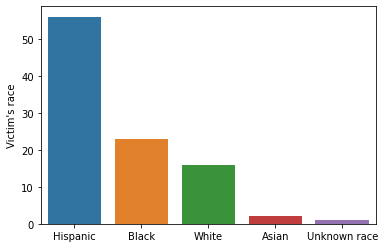

In [32]:
sns.barplot(x=la_sheriff_race.index, y=la_sheriff_race)

In [36]:
la_sheriff_df['Symptoms of mental illness?'].value_counts()

No                     58
Unknown                20
Yes                    11
Drug or alcohol use     9
Name: Symptoms of mental illness?, dtype: int64

In [38]:
pv_df['ORI Agency Identifier (if available)'].sample(10)

6105    Not Found/No Agency ORI
3095        NV0160100;NV0160000
3445                  NM0010100
7009                  NM0010100
2481                  NJ0080200
4005                  CA0190100
1140                  CODPD0000
7992                  VA0470100
1042                  WA0320000
2887                  NC0600100
Name: ORI Agency Identifier (if available), dtype: object

In [42]:
deaths_depts.index

Index(['Los Angeles Police Department', 'Phoenix Police Department',
       'Los Angeles County Sheriff's Department', 'Chicago Police Department',
       'New York Police Department', 'Houston Police Department',
       'Las Vegas Metropolitan Police Department', 'U.S. Marshals Service',
       'San Antonio Police Department', 'Miami-Dade Police Department'],
      dtype='object')

In [58]:
spend_per_cap = {
    'Los Angeles Police Department' : 759, 
    'Phoenix Police Department' : 428,
    'Los Angeles County Sheriff\'s Department' : 759, 
    'Chicago Police Department' : 578,
    'New York Police Department' : 573,
    'Houston Police Department' : 360,
    'Las Vegas Metropolitan Police Department' : 579,
    'San Antonio Police Department' : 298, 
    'Miami-Dade Police Department' : 723
}

In [59]:
death_spend = pd.concat([deaths_depts, pd.Series(spend_per_cap)], axis=1)
cols = ['kills','spend']

In [60]:
death_spend = death_spend.drop('U.S. Marshals Service')

In [61]:
death_spend.columns = cols

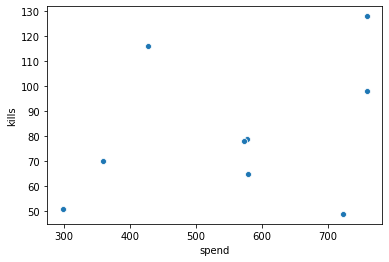

In [63]:
sns.scatterplot(x='spend',y='kills', data=death_spend)

In [67]:
corr = pearsonr(death_spend.spend,death_spend.kills)
corr

(0.335518659111939, 0.3774036000321946)

In [87]:
armed = pv_df.groupby('Unarmed/Did Not Have an Actual Weapon').get_group('Allegedly Armed')

In [88]:
armed

,Victim's name,Victim's age,Victim's gender,Victim's race,URL of image of victim,Date of Incident (month/day/year),Street Address of Incident,City,State,Zipcode,...,Unarmed/Did Not Have an Actual Weapon,Alleged Weapon or Object (Source: WaPo and Review of Cases Not Included in WaPo Database),Alleged Threat Level (Source: WaPo),Fleeing (Source: WaPo),Body Camera (Source: WaPo),WaPo ID (If included in WaPo database),Off-Duty Killing?,Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rural-classification.xlsx ),MPV ID,Fatal Encounters ID
1,Name withheld by police,43,Male,Black,NaN,2020-08-29,400 Yorkshire Boulevard,Dearborn Heights,MI,48127.0,...,Allegedly Armed,gun,attack,Not fleeing,NaN,NaN,NaN,Suburban,NaN,28696.0
2,Michael Anthony Harris,44,Male,Unknown race,NaN,2020-08-29,1638 Espanola Avenue,Daytona Beach,FL,32117.0,...,Allegedly Armed,gun,attack,Not fleeing,Yes,6120.0,NaN,Suburban,NaN,28695.0
3,Name withheld by police,Unknown,Male,Unknown race,NaN,2020-08-29,1200 M 3/4 Road,Loma,CO,81524.0,...,Allegedly Armed,gun,other,Not fleeing,No,6118.0,NaN,Rural,NaN,28697.0
5,Damian Lamar Daniels,38,Male,White,NaN,2020-08-27,1000 S Main St,Salt Lake City,UT,84101.0,...,Allegedly Armed,gun,other,Foot,No,6113.0,NaN,Urban,NaN,28686.0
6,Name withheld by police,17,Male,Hispanic,NaN,2020-08-26,1200 West Calle Rancho Rio,Tucson,AZ,85714.0,...,Allegedly Armed,gun,attack,Foot,Yes,6121.0,NaN,Suburban,NaN,28681.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8400,Andrew L. Closson,21,Male,White,http://www.superiortelegram.com/sites/default/...,2013-01-01,U.S. Highway 53,Gordon,WI,54838.0,...,Allegedly Armed,gun,NaN,NaN,NaN,NaN,NaN,Rural,5.0,12172.0
8401,Christopher Tavares,21,Male,Hispanic,http://www.krdo.com/image/view/-/17980228/medR...,2013-01-01,Highway 50 and North Elizabeth Street,Pueblo,CO,81008.0,...,Allegedly Armed,gun,NaN,NaN,NaN,NaN,NaN,Suburban,4.0,12176.0
8402,Abel Gurrola,26,Male,Hispanic,http://www.bakersfieldnow.com/news/local/A-26-...,2013-01-01,720 Terrace Way,Bakersfield,CA,93304.0,...,Allegedly Armed,gun,NaN,NaN,NaN,NaN,NaN,Urban,3.0,12174.0
8403,Tyree Bell,31,Male,Black,http://content.omaha.com/media/maps/ps/2013/ja...,2013-01-01,3727 N. 42nd St.,Omaha,NE,68111.0,...,Allegedly Armed,gun,NaN,NaN,NaN,NaN,NaN,Urban,2.0,12173.0
